In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
import nltk
nltk.download('stopwords')      # Stopwords for preprocessing
nltk.download('punkt')          # Tokenizer for text processing

[nltk_data] Downloading package stopwords to /home/b4c53a70-6689-41bb-
[nltk_data]     ba4d-38541b29f65b/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/b4c53a70-6689-41bb-
[nltk_data]     ba4d-38541b29f65b/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
3.#loading the csv file dataset
data = pd.read_csv("amazon_reviews.csv")
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1.0,Do not waste your money.,1374537600,2013-07-23,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5.0,Great item!,1377129600,2013-08-22,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5.0,Fast and reliable memory card,1396224000,2014-03-31,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5.0,Great little card,1379289600,2013-09-16,448,0,0


In [9]:
data.head

<bound method NDFrame.head of           reviewerID        asin  reviewerName helpful  \
0     A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1     A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2     A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3      A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4     A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   
...              ...         ...           ...     ...   
4910  A2LBMKXRM5H2W9  B007WTAJTO        ZM "J"  [0, 0]   
4911   ALGDLRUI1ZPCS  B007WTAJTO            Zo  [0, 0]   
4912  A2MR1NI0ENW2AD  B007WTAJTO     Z S Liske  [0, 0]   
4913  A37E6P3DSO9QJD  B007WTAJTO      Z Taylor  [0, 0]   
4914   A8KGFTFQ86IBR  B007WTAJTO           Zza  [0, 0]   

                                             reviewText  overall  \
0                                            No issues.      4.0   
1     Purchased this for my device, it worked as adv...      5.0   
2     it works as expected. I should have sprung for...      4.0   
3

In [17]:
4. #Data Cleaning
data.drop_duplicates(inplace=True)
data.dropna(subset=['reviewText', 'overall'], inplace=True)

In [21]:
 5. #Preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_tokens)

In [23]:
# Ensure the 'reviews.text' column exists
data = data.rename(columns=lambda x: x.strip())  # Strip column names to avoid leading/trailing spaces
if 'reviewText' in data.columns:
    data['cleaned_review'] = data['reviewText'].apply(preprocess_text)  # Update 'reviews.text' to your column name
else:
    raise ValueError("Column 'reviewText' is missing in the dataset.")

In [29]:
# 6. Label Sentiment
# Assume rating column has values from 1-5, where 1-2 = Negative, 3 = Neutral, 4-5 = Positive
def label_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

if 'overall' in data.columns:
    data['sentiment'] = data['overall'].apply(label_sentiment)
else:
    raise ValueError("Column 'overall' is missing in the dataset.")

In [31]:
# 7. Convert Text to Numerical Features
if not data['cleaned_review'].str.strip().replace('', pd.NA).isna().all():
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(data['cleaned_review']).toarray()
    y = data['sentiment']
else:
    raise ValueError("Cleaned reviews result in an empty vocabulary. Ensure valid data is present.")

In [33]:
# 8. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 9. Train Classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# 10. Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.930824008138352
Precision: 0.8980788222326523
Recall: 0.930824008138352
F1-Score: 0.9086704518222716


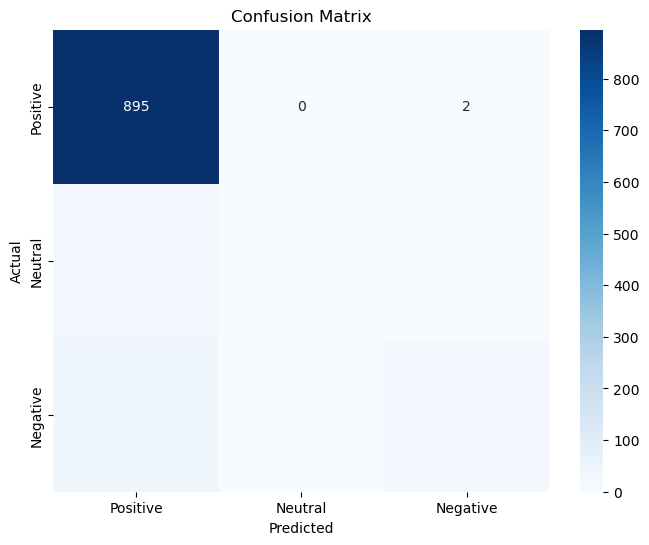

In [41]:
# 11. Visualize Results
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Sentiment distribution
if 'Sentiment' in data.columns:
    sentiment_counts = data['Sentiment'].value_counts()
    plt.figure(figsize=(6, 4))
    sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'Sentiment' does not exist.")

Column 'Sentiment' does not exist.


In [47]:
14.# Save Results
data[['reviewText', 'cleaned_review', 'sentiment']].to_csv('processed_reviews.csv', index=False)